In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
import os
for dirname, _, filenames in os.walk('./handwrite'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./handwrite\t10k-images.idx3-ubyte
./handwrite\t10k-labels.idx1-ubyte
./handwrite\train-images.idx3-ubyte
./handwrite\train-labels.idx1-ubyte
./handwrite\t10k-images-idx3-ubyte\t10k-images-idx3-ubyte
./handwrite\t10k-labels-idx1-ubyte\t10k-labels-idx1-ubyte
./handwrite\train-images-idx3-ubyte\train-images-idx3-ubyte
./handwrite\train-labels-idx1-ubyte\train-labels-idx1-ubyte


In [29]:
from sklearn.metrics import accuracy_score
import idx2numpy

In [32]:
# Load MNIST dataset     
X_train = 'handwrite/train-images.idx3-ubyte'
y_train = 'handwrite/train-labels.idx1-ubyte'
X_test = 'handwrite/t10k-images.idx3-ubyte'
y_test = 'handwrite/t10k-labels.idx1-ubyte'

In [33]:
X_train = idx2numpy.convert_from_file(X_train)
y_train = idx2numpy.convert_from_file(y_train)
X_test = idx2numpy.convert_from_file(X_test)
y_test = idx2numpy.convert_from_file(y_test)

In [34]:
#image flattening

In [35]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)


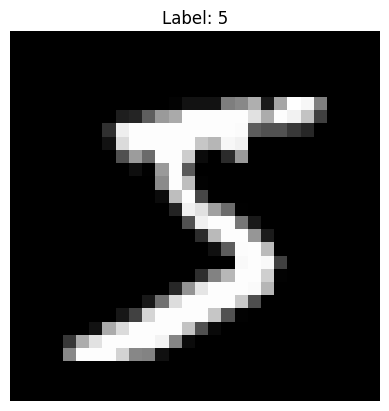

In [44]:
first_image = X_train[0].reshape(28, 28)  # Reshape to 28x28

# Plot the first image
plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

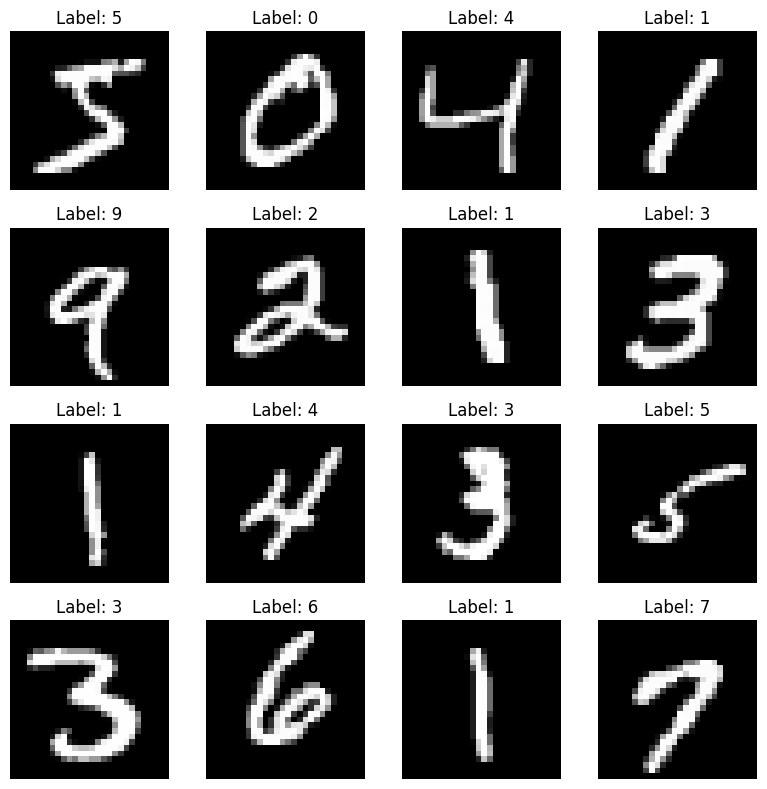

In [46]:
num_images = 16  # Number of images to plot
rows, cols = 4, 4  # Grid dimensions

fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for i, ax in enumerate(axes.ravel()):
    image = X_train[i].reshape(28, 28)  # Reshape to 28x28
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [37]:
#normalize data
X_test = X_test/255.0
X_train = X_train/255.0

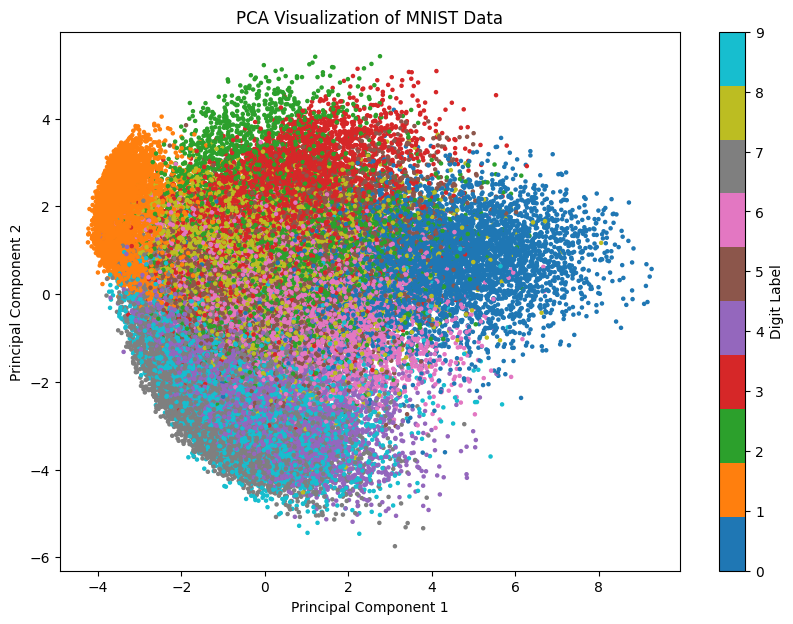

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10,7))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c=y_train, cmap='tab10', s=5)

plt.colorbar(scatter, label='Digit Label')
plt.title("PCA Visualization of MNIST Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

model_l = SVC(kernel='linear')
model_l.fit(X_train, y_train)


SVC(kernel='linear')

In [42]:
model_p = SVC(kernel='poly')
model_p.fit(X_train, y_train)

SVC(kernel='poly')

In [43]:
model_r = SVC(kernel='rbf')
model_r.fit(X_train, y_train)

SVC()

In [45]:
y_pred_l = model_l.predict(X_test)
accuracy_l = accuracy_score(y_test, y_pred_l)
y_pred_p = model_p.predict(X_test)
accuracy_p = accuracy_score(y_test, y_pred_p)
y_pred_r = model_r.predict(X_test)
accuracy_r = accuracy_score(y_test, y_pred_r)
accuracy_l, accuracy_p, accuracy_r

(0.9404, 0.9771, 0.9792)